<a href="https://colab.research.google.com/github/NeerajaJayanthy/Data-Visualisation-using-python/blob/main/MICRO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

upload=files.upload()
data=pd.read_csv('retail_sales_data.csv')
print(data.head())

Saving retail_sales_data.csv to retail_sales_data.csv
                             Product ID Product Category         Salesperson  \
0  8026aba0-60c4-4924-ad13-5a042e2f5b3c        Furniture     Anthony Aguirre   
1  d1b2a64e-9854-41c2-b04c-3372dba980e2         Clothing      Nathan Lambert   
2  2d2d2fde-3e08-439d-9e5e-be88ba7e2c18             Food      Nathan Lambert   
3  1ceed47b-3e1c-4335-bd68-f508bbfe27db             Toys  Christian Cardenas   
4  eb7e61b6-d418-4799-b0a0-ed9f1a9bfaba        Furniture         David Simon   

  Region  Total Sales  Quantity Sold  Discount Applied   Sale Date Sales Month  
0   West       806.63             75              0.22  27-05-2024        June  
1   East      4800.98             72              0.21  07-03-2024    December  
2   West      2189.64             56              0.01  06-09-2024   September  
3  North      4151.47              2              0.12  23-03-2024     January  
4   West      3630.30             71              0.07  14-0

the data frame is:
      Product Category      Salesperson Region
0         Electronics      David Simon  North
1                Toys  Anthony Aguirre   West
2           Furniture   Nathan Lambert   West
3           Furniture    Joseph Morton  North
4                Toys    Melanie Smith   West
...               ...              ...    ...
1995             Food       Erin Clark  South
1996             Food      Derek Black  North
1997      Electronics    Joseph Morton   West
1998         Clothing       Bryan Reed   West
1999             Food    Destiny Price  North

[2000 rows x 3 columns]
0.013199985103861374
Product Category
Furniture      0.2065
Food           0.2060
Clothing       0.1980
Toys           0.1975
Electronics    0.1920
Name: proportion, dtype: float64
0    North
1    South
2     East
3     West
dtype: object

the total revenue lost is:                                  Product ID Product Category      Salesperson  \
0     d4665585-ce8e-4bc7-aaf8-877d42a3b9f3      Electro

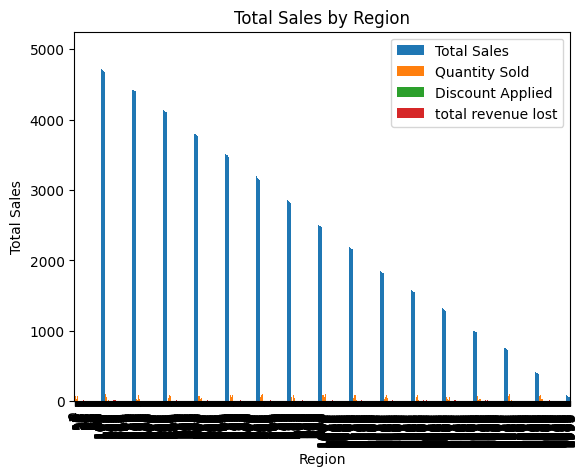

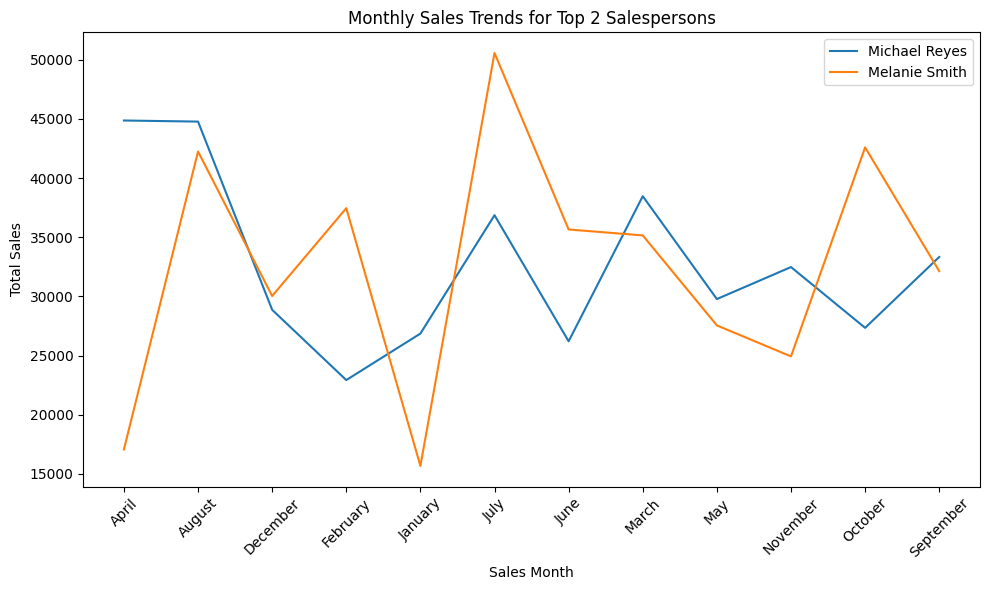

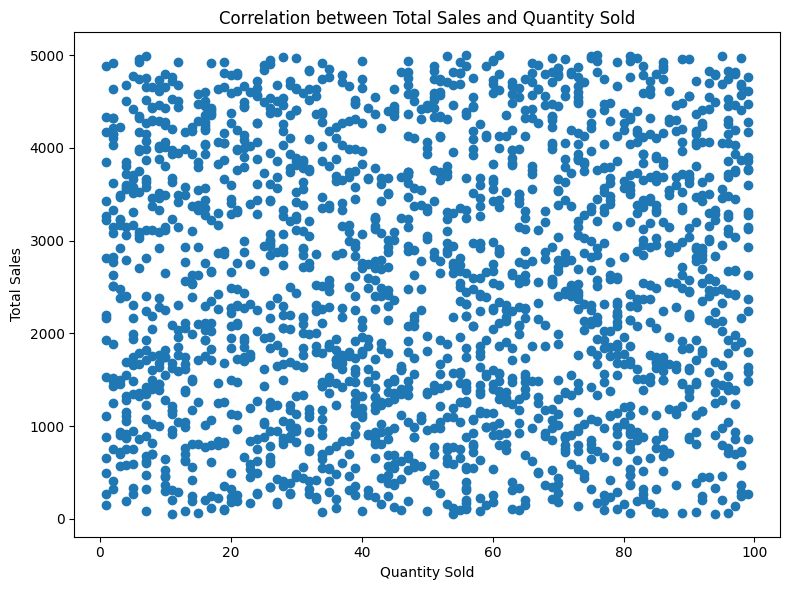

Top 10 Products with Highest Sales:
                                      Product Category             Salesperson  \
Product ID                                                                      
d4665585-ce8e-4bc7-aaf8-877d42a3b9f3      Electronics             David Simon   
e37df70f-911b-43c6-b81e-741545fadc58             Toys         Anthony Aguirre   
94b07213-a239-4489-bade-aad1121bef16        Furniture          Nathan Lambert   
6e5ac727-1882-4a85-921c-aa0735f1d075        Furniture           Joseph Morton   
94742402-4ca7-4ca3-b1fe-6743c0bd6eae             Toys           Melanie Smith   
8fbda0bd-b2dc-411d-8806-cccae19af93f      Electronics              Erin Clark   
0cf9de05-7add-4f44-a408-ef70cdadc973        Furniture             David Simon   
962e7b42-30dd-48a4-9385-0d1affac8675        Furniture  Mrs. Kristina Stafford   
64b7f817-cdf7-4b32-9bcc-19199b6cd25b      Electronics           Michael Reyes   
eda47fce-0658-4d38-95ed-e0e5bd3d7d47         Clothing           Troy Wil

ValueError: time data "30-03-2024" doesn't match format "%m-%d-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#QN 1
datafr=pd.DataFrame(data[['Product Category','Salesperson','Region']])
print("the data frame is:\n",datafr)

TotalSales=pd.Series(data['Total Sales'])
DiscountApplied=pd.Series(data['Discount Applied'])
average_discount=((DiscountApplied/TotalSales).mean())*100
print(average_discount)

#QN 2
product_sales = data.groupby('Product ID')['Product Category'].sum()
top_3_products = product_sales.value_counts(3)
top_3_sales_series = pd.Series(top_3_products)
print(top_3_sales_series)

product_sales = data.groupby('Product ID')['Region'].sum()
top_3_products1 = product_sales.unique()
top_3_sales_series1 = pd.Series(top_3_products1)
print(top_3_sales_series1)


quantity=pd.Series(data['Quantity Sold'])
price=pd.Series(data['Discount Applied'])
data['total revenue lost']=(quantity*price)
print("\nthe total revenue lost is: ",data)

#QN 3
data3 = data[(data["Region"]=="North")|(data["Region"]=="South")&(data["Total Sales"]>500)]
print(data3)

product_sales = data.groupby(['Salesperson','Product Category'])['Quantity Sold'].sum()
print(product_sales)

pivot_table=data.pivot_table(values='Total Sales', index=['Sales Month', 'Product Category'], aggfunc='mean')
print(pivot_table)

#QN 4
x=data.plot(kind='bar', xlabel='Region', ylabel='Total Sales', title='Total Sales by Region')
plt.show()

top_salespersons = data.groupby('Salesperson')['Total Sales'].sum().nlargest(2).index
top_sales_monthly = data[data['Salesperson'].isin(top_salespersons)].groupby(['Sales Month', 'Salesperson'])['Total Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
for salesperson in top_salespersons:
    salesperson_data = top_sales_monthly[top_sales_monthly['Salesperson'] == salesperson]
    plt.plot(salesperson_data['Sales Month'], salesperson_data['Total Sales'], label=salesperson)

plt.xlabel('Sales Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends for Top 2 Salespersons')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create scatter plot for correlation between Total Sales and Quantity Sold
plt.figure(figsize=(8, 6))
plt.scatter(data['Quantity Sold'], data['Total Sales'])
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
plt.title('Correlation between Total Sales and Quantity Sold')
plt.tight_layout()
plt.show()

#QN 5
data = data.set_index('Product ID').sort_values('Total Sales', ascending=False)
print("Top 10 Products with Highest Sales:\n", data.head(10))
data_sorted = data.sort_values(['Sales Month', 'Region'])
print("\nSorted by Sales Month and Region (First 5 rows):\n", data_sorted.head(5))
data = data.reset_index()
print("\nData with Reset Index (Top 5 rows):\n", data.head(5))

#QN 6
missing_quantity = data['Quantity Sold'].isnull()
missing_discount = data['Discount Applied'].isnull()
print("Rows with missing Quantity Sold:\n", data[missing_quantity])
print("\nRows with missing Discount Applied:\n", data[missing_discount])
data['Discount Applied'] = data.groupby('Product Category')['Discount Applied'].transform(lambda x: x.fillna(x.median()))
data = data.dropna(subset=['Total Sales', 'Quantity Sold'], how='all')




